## Python Scikit Learn API

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
%config IPCompleter.use_jedi=False

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r'C:\Users\dell\Desktop\Python\week8\Salary.csv')
df.head()

,Country,Experience_year,Salary_usd,change_company_a_lot
0,usa,1.1,36154,0
1,finland,1.3,46205,1
2,england,1.5,37731,1
3,usa,2.0,43525,0
4,france,NaN,39891,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               34 non-null     object 
 1   Experience_year       34 non-null     float64
 2   Salary_usd            35 non-null     int64  
 3   change_company_a_lot  35 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
df.shape

(35, 4)

## My Transformer

In [6]:
import requests 
from bs4 import BeautifulSoup
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler

class ExchangerToManat(BaseEstimator,TransformerMixin):
     # TransofmerMixin provides fit_transform method
     # BaseEstimator is using GridSearch and Pipeline by using get and set_params methods
    def fit(self,X,Y=None):
        
        # get currency today # from Yelobank
        
        url ="https://www.yelo.az/az/exchange-rates/"
        headers={"User-Agent":"Chrome/90.0.4430.93"}
        page=requests.get(url,headers=headers)
        soup=BeautifulSoup(page.text,"html.parser")
        currency=soup.find("div",class_="td_c_item table_sell_rate")
        self.__currency=float(currency.get("data-nocash"))
        
        return self
    
    def transform(self,X):
        X_new=X.copy()
        X_new*=self.__currency
        
        return X_new

In [7]:
exc=ExchangerToManat()
exc=exc.fit(df.Salary_usd)
df["Salary_AZN"]=exc.transform(df.Salary_usd)
df.head()

,Country,Experience_year,Salary_usd,change_company_a_lot,Salary_AZN
0,usa,1.1,36154,0,61552.1850
1,finland,1.3,46205,1,78664.0125
2,england,1.5,37731,1,64237.0275
3,usa,2.0,43525,0,74101.3125
4,france,NaN,39891,0,67914.4275


## Or

In [8]:
exc=ExchangerToManat()
df["Salary_AZN"]=exc.fit_transform(df.Salary_usd)
df.head()

,Country,Experience_year,Salary_usd,change_company_a_lot,Salary_AZN
0,usa,1.1,36154,0,61552.1850
1,finland,1.3,46205,1,78664.0125
2,england,1.5,37731,1,64237.0275
3,usa,2.0,43525,0,74101.3125
4,france,NaN,39891,0,67914.4275


In [9]:
exc._ExchangerToManat__currency

1.7025

## Build Pipeline 1

In [11]:
titanic_url = ('https://raw.githubusercontent.com/amueller/scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [12]:
X = data.drop('survived', axis=1)
y = data['survived']

In [13]:
X.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [14]:
X.embarked

0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

In [15]:
X[X.embarked.isnull()]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [16]:
for cat in ['embarked', 'sex', 'pclass']:
    X[cat].fillna('missing', inplace=True)

In [17]:
X[X.embarked=='missing']

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,missing,6,NaN,NaN
284,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,missing,6,NaN,"Cincinatti, OH"


In [18]:
X.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

numeric_features = ['age', 'fare']
categorical_features = ['embarked', 'sex', 'pclass']

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numeric_pipeline = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])


categorical_pipeline = Pipeline(
    steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) #handle_unknow is use for unknown values transform onehotencoding
    ])

In [22]:
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

mypipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(random_state=42))
                            
    ])

In [23]:
mypipeline.fit(X_train,y_train)
mypipeline.score(X_test,y_test)

0.7709923664122137

In [24]:
y_pred_logistic = mypipeline.predict(X_test)

## Metrics

In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_logistic))
print()
print('accuracy_score', accuracy_score(y_test, y_pred_logistic))
print('roc auc score: ', roc_auc_score(y_test, y_pred_logistic))
print('recall score: ', recall_score(y_test, y_pred_logistic))
print('precesion score: ', precision_score(y_test, y_pred_logistic))
print('f1 score: ', f1_score(y_test, y_pred_logistic))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_logistic))

confiion martrix: 
 [[126  18]
 [ 42  76]]

accuracy_score 0.7709923664122137
roc auc score:  0.7595338983050848
recall score:  0.6440677966101694
precesion score:  0.8085106382978723
f1 score:  0.7169811320754716

classification report:

               precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.81      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.76       262
weighted avg       0.78      0.77      0.77       262



## Roc Curve

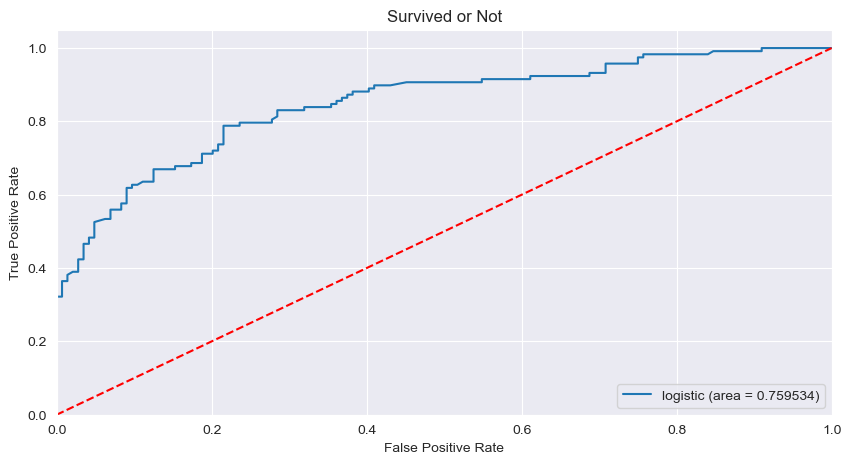

In [28]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logistic_roc_auc = roc_auc_score(y_test, y_pred_logistic)
fpr, tpr, thresholds = roc_curve(y_test, mypipeline.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='logistic (area = %02f)' % Logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
# plt.savefig('Logistic_ROC')
plt.show()

## Build Pipeline 2

In [29]:
df=pd.read_csv(r'C:\Users\dell\Desktop\Python\week8\Salary.csv')
df.head()

,Country,Experience_year,Salary_usd,change_company_a_lot
0,usa,1.1,36154,0
1,finland,1.3,46205,1
2,england,1.5,37731,1
3,usa,2.0,43525,0
4,france,NaN,39891,0


In [31]:
X=df.drop("change_company_a_lot",axis=1)
Y=df.change_company_a_lot

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.23,random_state=42)

In [33]:
X_train.columns

Index(['Country', 'Experience_year', 'Salary_usd'], dtype='object')

## Select Columns with types

In [34]:
numeric_columns=X.select_dtypes(include="number").columns
categorical_columns=X.select_dtypes(include="object").columns

In [35]:
numeric_columns, categorical_columns

(Index(['Experience_year', 'Salary_usd'], dtype='object'),
 Index(['Country'], dtype='object'))

## Prepared codes for using columns on pipeline

## Pipeline

In [40]:
# import pipename as pn

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numerical_Pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_Pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [42]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_Pipeline, categorical_columns),
        ('numerical', numerical_Pipeline, numeric_columns)
    ])

In [43]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [44]:
pipe.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Country'], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Experience_year', 'Salary_usd'], dtype='object'))]))])

In [48]:
columns = preprocessor.get_feature_names_out()
columns

array(['categorical__Country_england', 'categorical__Country_finland',
       'categorical__Country_france', 'categorical__Country_germany',
       'categorical__Country_norway', 'categorical__Country_usa',
       'numerical__Experience_year', 'numerical__Salary_usd'],
      dtype=object)

In [49]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [50]:
X_train_final=pd.DataFrame(X_train,columns=columns)
X_test_final=pd.DataFrame(X_test,columns=columns)
X_train_final.head()

,categorical__Country_england,categorical__Country_finland,categorical__Country_france,categorical__Country_germany,categorical__Country_norway,categorical__Country_usa,numerical__Experience_year,numerical__Salary_usd
0,1.0,0.0,0.0,0.0,0.0,0.0,-0.346464,-0.489522
1,0.0,0.0,0.0,0.0,0.0,1.0,-0.718434,-0.750421
2,0.0,0.0,0.0,0.0,0.0,1.0,1.725942,1.565970
3,0.0,0.0,0.0,0.0,0.0,1.0,-1.409236,-1.371236
4,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,-1.260944


## Model Build

In [58]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model=model.fit(X_train,y_train)
y_pred_xgb=model.predict(X_test)
y_pred_xgb

array([0, 1, 0, 0, 1, 0, 1, 1, 1])

## Metrics

In [60]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_xgb))
print()
print('accuracy_score', accuracy_score(y_test, y_pred_xgb))
print('roc auc score: ', roc_auc_score(y_test, y_pred_xgb))
print('recall score: ', recall_score(y_test, y_pred_xgb))
print('precesion score: ', precision_score(y_test,y_pred_xgb))
print('f1 score: ', f1_score(y_test, y_pred_xgb))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_xgb))

confiion martrix: 
 [[1 4]
 [3 1]]

accuracy_score 0.2222222222222222
roc auc score:  0.22499999999999998
recall score:  0.25
precesion score:  0.2
f1 score:  0.2222222222222222

classification report:

               precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.20      0.25      0.22         4

    accuracy                           0.22         9
   macro avg       0.23      0.23      0.22         9
weighted avg       0.23      0.22      0.22         9



## Roc Curve

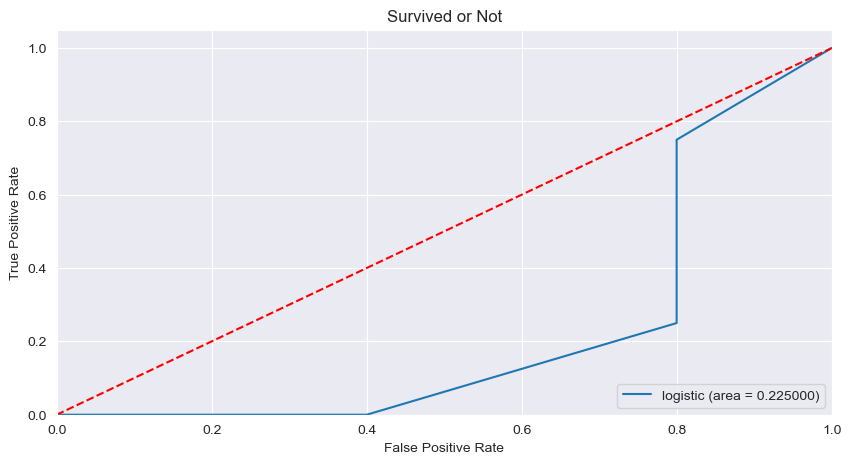

In [63]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgb)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='logistic (area = %02f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
# plt.savefig('Logistic_ROC')
plt.show()

## One Hot Encoding handle-unknown

In [64]:
mydf=pd.DataFrame({
    "Country":["AA","AA","AB","AB","AC","AD"]
})
mydf.head(10)

,Country
0,AA
1,AA
2,AB
3,AB
4,AC
5,AD


In [65]:
newdf=mydf.iloc[:-2]
one=OneHotEncoder(handle_unknown='ignore').fit(newdf)
newdf=one.transform(newdf)
newdf.toarray()

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [66]:
newtestdf=mydf.iloc[[-1]]
newtestdf=one.transform(newtestdf)
newtestdf.toarray()

array([[0., 0.]])

## Feature Engine Transformers

In [69]:
# !pip install feature_engine

In [70]:
from feature_engine.imputation import MeanMedianImputer

mydf=pd.DataFrame({
    "numbers":[5,6,7,8,np.nan,9,10,np.nan]
})

myimputer=MeanMedianImputer(imputation_method='median',variables=["numbers"])
mydf=myimputer.fit_transform(mydf)

mydf.head(8)

,numbers
0,5.0
1,6.0
2,7.0
3,8.0
4,7.5
5,9.0
6,10.0
7,7.5


### <a href="https://github.com/trainindata/deploying-machine-learning-models/blob/master/section-04-research-and-development/preprocessors.py">Extra Transformer Example</a>

### <a href="https://github.com/trainindata/deploying-machine-learning-models/blob/master/section-04-research-and-development/07-feature-engineering-pipeline.ipynb">Extra Pipeline Project Example</a>

## Model Creating and Saving

In [72]:
import pandas as pd 
diabetes=pd.read_csv(r"C:\Users\dell\Desktop\Python\week8\diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
X=diabetes.drop("Outcome",axis=1)
Y=diabetes.Outcome

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [75]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix \n\n",confusion_matrix(y_test,y_pred),"\n")
print("Accuary Score" , '= %0.2f' % accuracy_score(y_test,y_pred),"%")

Confusion Matrix 

 [[95 28]
 [24 45]] 

Accuary Score = 0.73 %


## Model Saving

## Exporting Model

In [77]:
import pickle
document="myModel"
pickle.dump(lr,open(document,"wb"))

## Importing Model

In [81]:
loaded_model=pickle.load(open('myModel','rb'))
y_loded_model_pred=loaded_model.predict(X_test)

In [82]:
y_loded_model_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix \n\n",confusion_matrix(y_test,y_loded_model_pred),"\n")
print("Accuary Score" , '= %0.2f' % accuracy_score(y_test,y_loded_model_pred),"%")

Confusion Matrix 

 [[95 28]
 [24 45]] 

Accuary Score = 0.73 %


# After Kernel Restarting

In [1]:
import pandas as pd 
diabetes=pd.read_csv(r"C:\Users\dell\Desktop\Python\week8\diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X=diabetes.drop("Outcome",axis=1)
Y=diabetes.Outcome

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [4]:
import pickle
document="myModel"
loaded_model=pickle.load(open(document,'rb'))
y_loded_model_pred=loaded_model.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix \n\n",confusion_matrix(y_test,y_loded_model_pred),"\n")
print("Accuary Score" , '= %0.2f' % accuracy_score(y_test,y_loded_model_pred),"%")

Confusion Matrix 

 [[95 28]
 [24 45]] 

Accuary Score = 0.73 %


# After Kernel Restarting

In [1]:
import pandas as pd 
diabetes=pd.read_csv(r"C:\Users\dell\Desktop\Python\week8\diabetes.csv")
diabetes.drop('Outcome', axis=1, inplace=True)

In [2]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [3]:
X = diabetes

In [4]:
import pickle
document="myModel"
loaded_model=pickle.load(open(document,'rb'))
y_loded_model_pred=loaded_model.predict(X)

In [5]:
diabetes['Outcome'] = y_loded_model_pred

In [6]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,0


## Compare New and Old Predict

In [7]:
diabetes_old=pd.read_csv(r"C:\Users\dell\Desktop\Python\week8\diabetes.csv")
diabetes_old['Outcome_new'] = diabetes.Outcome

In [8]:
diabetes_old

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_new
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


In [10]:
pd.crosstab(diabetes_old.Outcome, diabetes_old.Outcome_new)

Outcome_new,0,1
Outcome,,
0,431,69
1,111,157


In [11]:
diabetes_old.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
diabetes_old.Outcome_new.value_counts()

Outcome_new
0    542
1    226
Name: count, dtype: int64

## Difference

In [16]:
print('Diffrerence: ', len(diabetes_old[diabetes_old.Outcome != diabetes_old.Outcome_new]))
diabetes_old[diabetes_old.Outcome != diabetes_old.Outcome_new]

Diffrerence:  180


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_new
6,3,78,50,32,88,31.0,0.248,26,1,0
7,10,115,0,0,0,35.3,0.134,29,0,1
9,8,125,96,0,0,0.0,0.232,54,1,0
12,10,139,80,0,0,27.1,1.441,57,0,1
15,7,100,0,0,0,30.0,0.484,32,1,0
...,...,...,...,...,...,...,...,...,...,...
750,4,136,70,0,0,31.2,1.182,22,1,0
755,1,128,88,39,110,36.5,1.057,37,1,0
756,7,137,90,41,0,32.0,0.391,39,0,1
757,0,123,72,0,0,36.3,0.258,52,1,0
